# **Medical Data Visualization**

In [276]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [302]:
df = pd.read_csv('medical_examination.csv')
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## **Overweight Column**

In [228]:
BMI = df['weight']/((df['height']/100)**2)
BMI.head(10)

id
0     21.967120
1     34.927679
2     23.507805
3     28.710479
4     23.011177
8     29.384676
9     37.729725
12    29.983588
13    28.440955
14    25.282570
dtype: float64

In [229]:
def get_overweight(BMI, df):
    for index in BMI.index:
        if BMI.loc[index] > 25:
            df.loc[index, 'overweight'] = 1
        else: df.loc[index, 'overweight'] = 0

In [230]:
df['overweight'] = 'NaN'
get_overweight(BMI, df)
df['overweight'] = df['overweight'].astype('int64')
df['overweight'].head(10)

id
0     0
1     1
2     0
3     1
4     0
8     1
9     1
12    1
13    1
14    1
Name: overweight, dtype: int64

Simipler Version

In [279]:
df['overweight'] = ((df['weight']/(df['height']/100)**2) > 25).astype('int64')

## **Normalizing Data**

In [271]:
df[['cholesterol', 'gluc']].head(10)

,cholesterol,gluc
id,,
0,1,1
1,3,1
2,3,1
3,1,1
4,1,1
8,2,2
9,3,1
12,3,3
13,1,1


In [272]:
mask = df[['cholesterol', 'gluc']] == 1
mask.head(10)

,cholesterol,gluc
id,,
0,True,True
1,False,True
2,False,True
3,True,True
4,True,True
8,False,False
9,False,True
12,False,False
13,True,True


In [273]:
def normalizer(mask, df):
    for index in mask.index:
        if mask.loc[index, 'cholesterol'] == True:
            df.loc[index, 'cholesterol'] = 0
        else: df.loc[index, 'cholesterol'] = 1

        if mask.loc[index, 'gluc'] == True:
            df.loc[index, 'gluc'] = 0
        else: df.loc[index, 'gluc'] = 1

In [274]:
normalizer(mask, df)
df[['cholesterol', 'gluc']].head(10)

,cholesterol,gluc
id,,
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
8,1,1
9,1,0
12,1,1
13,0,0


In [280]:
df.head(10)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1


Simipler Version

In [285]:
df[['cholesterol', 'gluc']] = (df[['cholesterol', 'gluc']] > 1).astype('int64')

## **Converting To Long Format**

In [289]:
df_long = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
)
df_long.head(10)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


In [290]:
df_long.head(20)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


## **Visualization**

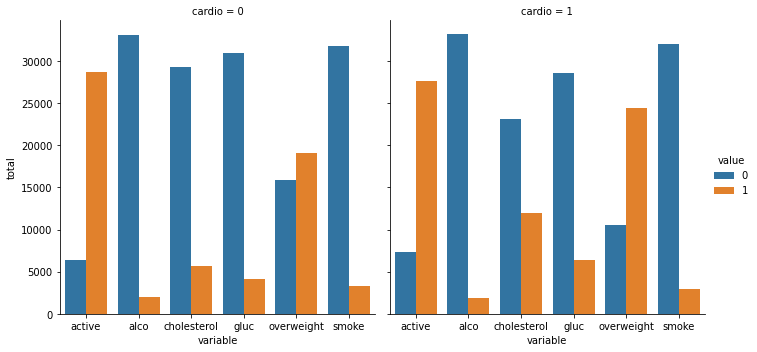

In [291]:
fig = sns.catplot(data=df_long, kind='count', x='variable', hue='value', col='cardio').set(ylabel='total')

## **Heat Map**

In [292]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [309]:
df_cleaned = df[ 
        ( df['ap_lo'] <= df['ap_hi'] ) & 
        ( df['height'] >= df['height'].quantile(0.025) ) & 
        ( df['height'] <= df['height'].quantile(0.975) ) & 
        ( df['weight'] >= df['weight'].quantile(0.025) ) & 
        ( df['weight'] <= df['weight'].quantile(0.975) ) 
]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63259 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63259 non-null  int64  
 1   age          63259 non-null  int64  
 2   sex          63259 non-null  int64  
 3   height       63259 non-null  int64  
 4   weight       63259 non-null  float64
 5   ap_hi        63259 non-null  int64  
 6   ap_lo        63259 non-null  int64  
 7   cholesterol  63259 non-null  int64  
 8   gluc         63259 non-null  int64  
 9   smoke        63259 non-null  int64  
 10  alco         63259 non-null  int64  
 11  active       63259 non-null  int64  
 12  cardio       63259 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


In [311]:
coor = df_cleaned.corr().round(1)
coor

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.2,0.1,-0.0,-0.0,-0.0,0.2
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3
cholesterol,0.0,0.2,-0.0,-0.1,0.1,0.0,0.2,1.0,0.5,0.0,0.0,0.0,0.2
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.5,1.0,-0.0,0.0,-0.0,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0


In [312]:
mask = np.triu(np.ones_like(coor))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

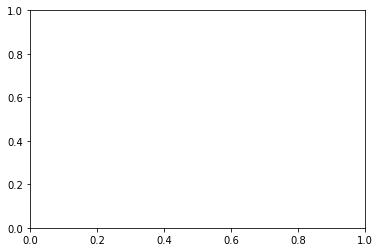

In [313]:
fig, axis = plt.subplots()

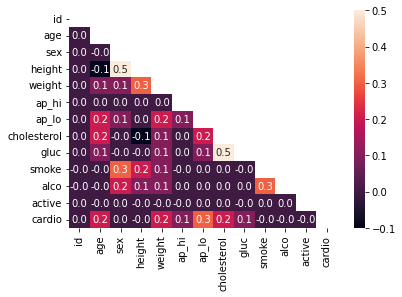

In [314]:
axis = sns.heatmap(data=coor, mask=mask, annot=True, fmt='0.1f')